0 %
5.0761421319796955 % dt - 0.19881701469421387
10.152284263959391 % dt - 0.18880915641784668
15.228426395939088 % dt - 0.19288873672485352
20.304568527918782 % dt - 0.1960146427154541
25.380710659898476 % dt - 0.18302059173583984
30.456852791878177 % dt - 0.2608492374420166
35.025380710659896 % dt - 0.22020602226257324
40.10152284263959 % dt - 0.3012197017669678
45.17766497461929 % dt - 0.25783634185791016
50.25380710659898 % dt - 0.33681750297546387
55.32994923857868 % dt - 0.6355054378509521
60.40609137055838 % dt - 0.6950268745422363
65.48223350253807 % dt - 0.7280776500701904
70.05076142131979 % dt - 0.7007362842559814
75.1269035532995 % dt - 0.8099052906036377
80.20304568527918 % dt - 0.8330657482147217
85.27918781725889 % dt - 0.7836968898773193
90.35532994923858 % dt - 0.7777063846588135
95.43147208121827 % dt - 0.7136731147766113


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


100 % time - 9.54456615447998


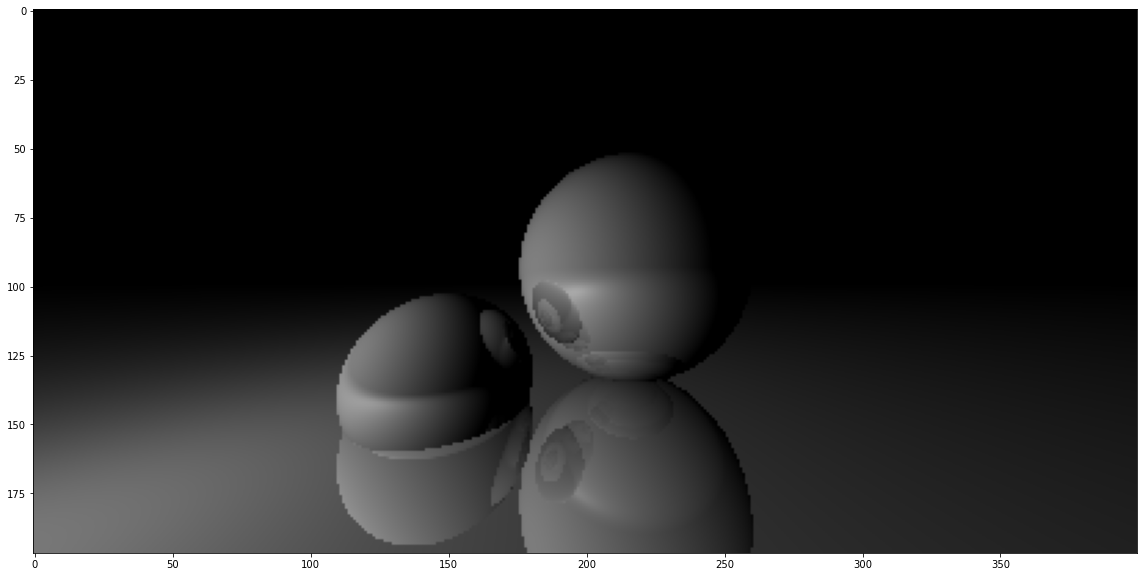

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

eps = 2**(-20)

class empty():
    def __init__(self):
        return None

def normalize(x):
    x /= np.linalg.norm(x)
    return x

# ------------------------------------------------------------------------------
# ------------------------------------------------------------------------------

def render_image (camera, scene, screen, *, status = 5):
    w = screen.w
    h = screen.h
    
    image = np.zeros((h, w, 3))
    
     # ----- status output -----
    procents = 0
    if 0 < status <= 100:
        print(0,'%')
        start_t = time.time()
        last_t = start_t
        
    for i in range(h):
        for k in range(w):
            pixel_pos = camera.position + camera.orientate + camera.delta*(camera.dx*(k - w/2) + camera.dy*(h/2 - i))
            ray = normalize(pixel_pos - camera.position)
            
            image[i][k] = trace_ray(scene, pixel_pos, ray, 20)
        
        if 0 < status <= 100: # ----- status output -----
            if procents < ((i/h)*100) // status:
                tmp = time.time()
                print(i/h*100,'% dt -', tmp - last_t)
                last_t = tmp
                procents = ((i/h)*100) // status
    if 0 < status <= 100: # ----- status output -----
        end_t = time.time()
        print(100,'% time -', end_t - start_t)
    
    return image

def trace_ray (scene, start, ray, deepth=20):
    ans = np.zeros(3)
    if deepth <= 0:
        return ans

    light = np.array([3.0, 5, -10.0])
    
    alpha = 0.5
    normal, point = scene.get_normal(start, ray)
    if normal is not None:
        ans += np.ones((3))*np.sum(normalize(light-point) * normal) * alpha
        ray -= 2*normal*np.sum(normal*ray)
        ans += (1-alpha) *trace_ray(scene, point + eps*ray, ray, deepth-1)
    return ans

# ------------------------------------------------------------------------------
'''
    ^ y
    |
    |
    |
    o--------> x
   /
  /
 /
L z
'''
# Scene ------------------------------------------------------------------------

my_scene = empty()

def plane(start, ray):
    first_ans = None
    best_t = np.inf
    S = np.array([10,1,-5])
    R = 3
    O = start;
    a = np.dot(ray, ray)
    OS = start - S
    b = 2 * np.dot(ray, OS)
    c = np.dot(OS, OS) - R * R
    disc = b * b - 4 * a * c
    if disc > 0:
        distSqrt = np.sqrt(disc)
        q = (-b - distSqrt) / 2.0 if b < 0 else (-b + distSqrt) / 2.0
        t0 = q / a
        t1 = c / q
        t0, t1 = min(t0, t1), max(t0, t1)
        if t1 >= 0:
            if t0 < 0:
                first_ans = normalize(start + ray*t1 - S)
                best_t = t1
            else:
                first_ans = normalize(start + ray*t0 - S)
                best_t = t0
    S = np.array([13,5,2])
    R = 5
    O = start;
    a = np.dot(ray, ray)
    OS = start - S
    b = 2 * np.dot(ray, OS)
    c = np.dot(OS, OS) - R * R
    disc = b * b - 4 * a * c
    if disc > 0:
        distSqrt = np.sqrt(disc)
        q = (-b - distSqrt) / 2.0 if b < 0 else (-b + distSqrt) / 2.0
        t0 = q / a
        t1 = c / q
        t0, t1 = min(t0, t1), max(t0, t1)
        if t1 >= 0:
            if t0 < 0:
                if best_t > t1:
                    first_ans = normalize(start + ray*t1 - S)
                    best_t = t1
            else:
                if best_t > t0:
                    first_ans = normalize(start + ray*t0 - S)
                    best_t = t0
                    
    if ray[1]*start[1] < 0:
        if best_t > -start[1]/ray[1]:
            first_ans = np.array([0,1,0])
            best_t = -start[1]/ray[1]
    if first_ans is not None:
        return first_ans, start + ray*best_t
    return None, None
    
    
my_scene.get_normal = plane


# ------------------------------------------------------------------------------
# Camera and screen ------------------------------------------------------------

my_camera = empty()
my_camera.position = np.array([0.0, 4.4, 0.0])
my_camera.orientate = np.array([0.1, 0, 0])
my_camera.dx = np.array([0.0, 0.0, 1.0])
my_camera.dy = np.array([0.0, 1.0, 0.0])
my_camera.delta = 0.001

camera_screen = empty()
camera_screen.w = 400
camera_screen.h = 197

# ------------------------------------------------------------------------------
# Run render functon for prepeared scene ---------------------------------------
    
img = render_image(my_camera, my_scene, camera_screen)

#plt.imsave('tmp.png', img)
plt.figure(figsize=(20,10))
plt.imshow(img)